# Analyzing Police Activity with pandas

## Course Description

### This course explores the Stanford Open Policing Project dataset and analyzes the impact of weather, time of day, reason for traffic stop and gender of driver on police behavior. It covers cleaning messy data, creating visualizations, combining and reshaping datasets, and manipulating time series data.

### Preparing data for analysis

#### Before beginning the analysis, it is critical to first examine and clean the dataset, to make working with it a more efficient process. This chapter covers fixing data types, handling missing values, and dropping columns and rows while learning about the Stanford Open Policing Project dataset. 

The dataset contains traffic stops by police officers, collected by the Stanford Open Policing Project. It has data on 31 US states. This course focuses on data from the state of Rhode Island. The full data can be downloaded from the project's website at https://openpolicing.stanford.edu/

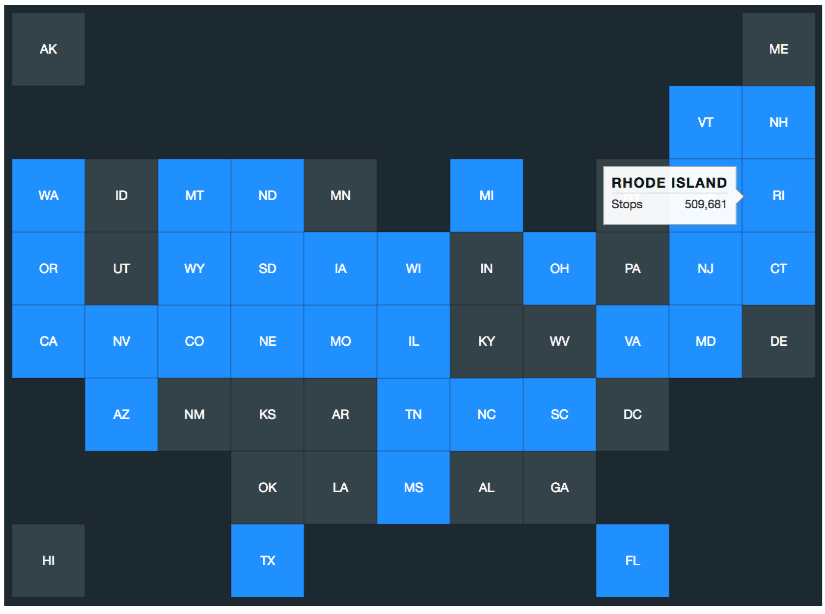

In [1]:
from IPython.display import Image
Image(filename='data/states.png')

Before beginning your analysis, it's important that we familiarize ourselves with the dataset. 

In [2]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('data/police.csv')

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

It looks like most of the columns have at least some missing values.

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns. In this case, the state and the county_name columns are non-relevant, since we only focus on data from Rhode Island.

In [3]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 13)


When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.
During this course, the `driver_gender` column will be critical to many of our analyses. Because only a small fraction of rows are missing `driver_gender`, we'll drop those rows from the dataset.

In [4]:
# Count all observations with non-missing and missing 'driver_gender'
print(ri.driver_gender.count())
print(ri.driver_gender.isnull().sum())

86536
5205


In [5]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


We dropped around 5,000 rows, which is a small fraction of the dataset, and now only one column remains with any missing values.

The data types of features were automatically inferred by `pandas` when reading in the *.csv* file. The data types currently in use are only `object` and `bool`. As data types affect which operations we can perform on a given Series, we should examine and fix data types in our dataset.

In [6]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

The `is_arrested` column currently has the object data type. We'll change the data type to bool, which is the most suitable type for a column containing `True` and `False` values.
Fixing the data type will enable us to use mathematical operations on the `is_arrested` column that would not be possible otherwise.

In [7]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype(bool)

# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
object
bool


The date and time of each traffic stop are stored in separate columns, both of which are object columns.

In [8]:
print(ri.iloc[:, 0:4].head())
print(ri.stop_date.dtype, ri.stop_time.dtype)

    stop_date stop_time driver_gender driver_race
0  2005-01-04     12:55             M       White
1  2005-01-23     23:15             M       White
2  2005-02-17     04:15             M       White
3  2005-02-20     17:15             M       White
4  2005-02-24     01:20             F       White
object object


We will combine them into a single column and then convert it to a `pandas` `datetime` format. This `datetime` column will function as the `Index` of the dataFrame, that will make it easier to filter and plot it by date.

In [9]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep = ' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data type of 'stop_datetime'
print(ri.stop_datetime.dtype)

datetime64[ns]


In [10]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns ('stop_datetime' is no longer one of the columns)
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


Now that we have cleaned the dataset, we can begin analyzing it!

### Exploring the relationship between gender and policing

#### Does the gender of a driver have an impact on police behavior during a traffic stop? In this chapter, we explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more! 

Before comparing the violations being committed by each gender, we should examine the violations committed by all drivers to get a baseline understanding of the data.

In [11]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

print('-------------------------------')

# Express the counts as proportions
print(ri.violation.value_counts(normalize = True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
-------------------------------
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


Interesting! More than half of all violations are for speeding, followed by other moving violations and equipment violations.

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.
In order to answer that, first we create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [12]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize = True))


print('-------------------------------')

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize = True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
-------------------------------
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


About two-thirds of female traffic stops are for speeding, whereas stops of males are more balanced among the six categories. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can we find evidence of this in the dataset?

First, we'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.
Then, for each gender, we'll use the `stop_outcome` column to calculate what percentage of stops resulted in a *"Citation"* (meaning a ticket) versus a *"Warning"*.

In [13]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize = True))

print('----------------------------------')

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize = True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
----------------------------------
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


Interesting! The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

During a traffic stop, the police officer sometimes conducts a search of the vehicle. Does the driver's gender affect whether their vehicle is searched? Let's calculate the percentage of all stops that result in a vehicle search, also known as the search rate.

In [14]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
0.0382153092354627


It looks like the overall search rate is about 3.8%. Now we compare the rates at which female and male drivers are searched.

In [15]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Wow! Male drivers are searched more than twice as often as female drivers. Why might this be?

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.
For example, we might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.
We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation.

In [16]:
# Calculate the search rate for each combination of violation and gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


For all types of violations, the search rate is higher for males than for females, disproving our hypothesis.

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk." First, we should check the different types of activities carried out during a search.

In [17]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

There were 164 cases where ONLY Protective Frisk was done. In other cases, there were multiple actions taken, resulting in a comma-separated representation of those actions. We can collect all cases when drivers were frisked using a string function.

In [18]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na = False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

bool
303


It looks like there were 303 drivers who were frisked. Are males frisked more often than females, perhaps because police officers consider them to be higher risk? Next, we'll examine whether gender affects who is frisked.

In [19]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


Interesting! The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender, as [correlation does not imply causation](https://towardsdatascience.com/correlation-causation-how-alcohol-affects-life-expectancy-a68f7db943f8).

### Visual exploratory data analysis

#### Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, we will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot. 

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this part, we'll find out whether the arrest rate varies by time of day.

In [20]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


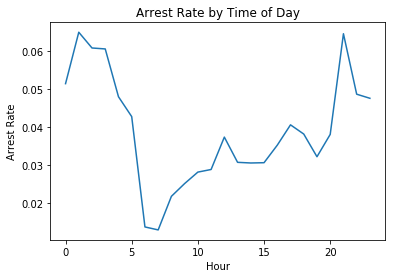

In [21]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

The arrest rate has a significant spike overnight, and then dips in the early morning hours.

In a small portion of traffic stops, drugs are found in the vehicle during a search. We'll assess whether these drug-related stops are becoming more common over time.
The Boolean column `drugs_related_stop` indicates whether drugs were found during a given stop. We'll calculate the annual drug rate by resampling this column, and then use a line plot to visualize how the rate has changed over time.


stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


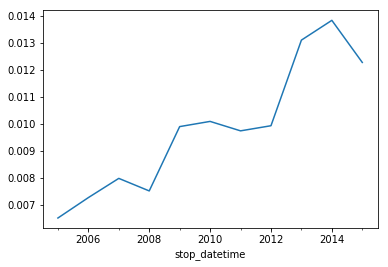

In [22]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

Interesting! The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

We might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.
We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates increasing over time.

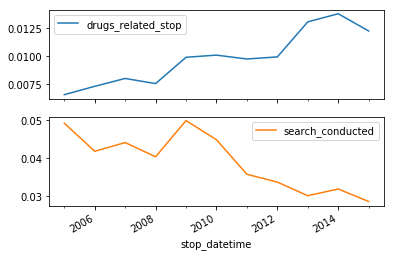

In [23]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = 'columns')

# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()

Wow! The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police? In this part, we'll create a frequency table to determine how many violations of each type took place in 3 specific zones.

In [24]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1' : 'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1' : 'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


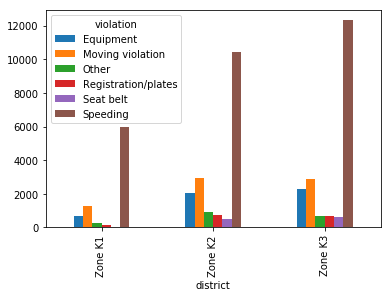

In [25]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind = 'bar')

# Display the plot
plt.show()

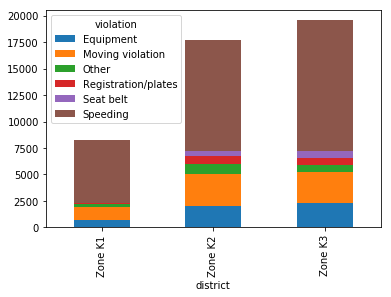

In [26]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind = 'bar', stacked = True)

# Display the plot
plt.show()

Interesting! The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

In the traffic stops dataset, the `stop_duration` column tells us approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as `'0-15 Min'`. We have to convert the stop durations to integers. Because the precise durations are not available, we'll have to estimate the numbers using reasonable values:
*	Convert `'0-15 Min'` to `8`
*	Convert `'16-30 Min'` to `23`
*	Convert `'30+ Min'` to `45`

In [27]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


If you were stopped for a particular violation, how long might you expect to be detained? Let's visualize the average length of time drivers are stopped for each type of violation.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


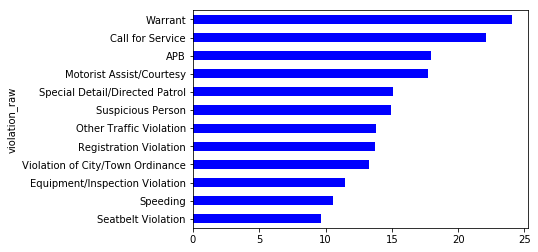

In [28]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind = 'barh', color = 'blue')

# Display the plot
plt.show()

### Analyzing the effect of weather on policing

#### In this part, we will use a second dataset to explore the impact of weather conditions on police behavior during traffic stops. We perform merging and reshaping datasets, assessing whether a data source is trustworthy, working with categorical data, and other advanced skills. 

The weather data we'll be using is collected by the National Centers for Environmental Information. In an ideal situation, we could look up the historical weather at the location for each stop. As it is not available, we'll use data from a single weather station near the center of Rhode Island. It is not ideal, but as it is the smallest state, it still could give us a general idea of weather throughout the state.

In [29]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('data/weather.csv')

weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


The interpretation of columns is as follows:

*	`TAVG`, `TMIN`, `TMAX`: Temperature (Fahrenheit)
*	`AWND`, `WSF2`: Wind speed (miles/hour)
*	`WT01` ... `WT22`: Bad weather conditions

First, let's check the temperature columns if we stop any anomaly in the data:

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


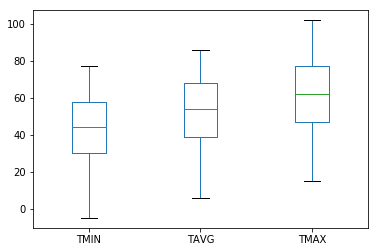

In [30]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind = 'box')

# Display the plot
plt.show()

The `TAVG` values are in between `TMIN` and `TMAX`, and the measurements and ranges seem reasonable.

We will continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


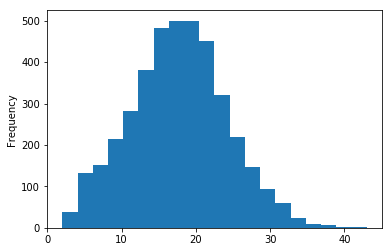

In [31]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind = 'hist', bins = 20)

# Display the plot
plt.show()

The `TDIFF` column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

The `weather` DataFrame contains 20 columns that start with *'WT'*, each of which represents a bad weather condition. For example:
*	`WT05` indicates "Hail"
*	`WT11` indicates "High or damaging winds"
*	`WT17` indicates "Freezing rain"
For every row in the dataset, each *WT* column contains either a 1 (meaning the condition was present that day) or `NaN` (meaning the condition was not present).
Let's quantify "how bad" the weather was each day by counting the number of 1 values in each row.

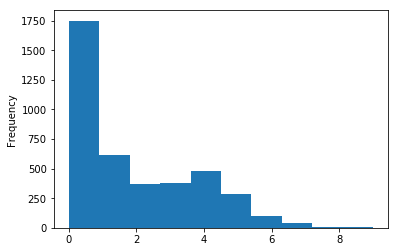

In [32]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01' : 'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis = 'columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind = 'hist')

# Display the plot
plt.show()

It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

We counted the number of bad weather conditions each day. Now we'll use the counts to create a rating system for the weather.
The counts range from 0 to 9, and should be converted to ratings as follows:
*	Convert `0` to `'good'`
*	Convert `1` through `4` to `'bad'`
*	Convert `5` through `9` to `'worse'`

This rating system should make the weather condition data easier to understand.

In [33]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


Since the `rating` column only has a few possible values, we'll change its data type to `category` in order to store the data more efficiently. We'll also specify a logical order for the categories, which will be useful for future analyses.

In [34]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category', ordered = True, categories = cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


We'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged.

In [35]:
# Reset the index of 'ri'
ri.reset_index(inplace = True)

# Examine the head of 'ri'
print(ri.head())

print('------------------------------------------------------------------------------')

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

The DataFrames will be joined using the `stop_date` column from `ri` and the `DATE` column from `weather_rating`. Thankfully the date formatting matches exactly, which is not always the case!
Once the merge is complete, we can set s`top_datetime` as the index, which is the column saved in the previous exercise.

In [36]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 16)
(86536, 18)


In the next section, we'll use `ri_weather` to analyze the relationship between weather conditions and police behavior.

Do police officers arrest drivers more often when the weather is bad? 

In [37]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

print('------------------')

# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

print('---------------------------------------')

# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

0.0355690117407784
------------------
rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64
---------------------------------------
violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


Wow! The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

Finally, we can look at these statistics by filtering for specific cases with the `.loc[]` accessor.

In [42]:
# Save the output of the groupby operation
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

print('----------------------------------------------------------------------------')

# Print the arrest rate for moving violations in bad weather
print('the arrest rate for moving violations in bad weather is ', arrest_rate.loc['Moving violation', 'bad'])

print('----------------------------------------------------------------------------')

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
----------------------------------------------------------------------------
the arrest rate for moving violations in bad weather is  0.05804964058049641
----------------------------------------------------------------

pandas often gives you more than one way to reach the same result!

In [39]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack)

print('-------------------------------------------------')

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

<bound method Series.unstack of violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64>
-------------------------------------------------
rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.06

This project is available at https://www.datacamp.com/courses/analyzing-police-activity-with-pandas.